In [ ]:
import pandas as pd
import warnings
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

In [ ]:
train = pd.read_csv('/content/train.csv', encoding = 'utf-8')
test = pd.read_csv('/content/test_x.csv', encoding = 'utf-8')
sample_submission = pd.read_csv('/content/sample_submission.csv', encoding = 'utf-8')

In [ ]:
# 특수문자 제거.
def alpha_num(text):
  text =  re.sub(r'[^A-Za-z0-9\s]', '', text)
  return text

train['text'] = train['text'].apply(alpha_num)

In [ ]:
train

In [ ]:
# 불용어 처리
def remove_stopwords(text):
  final_text = []
  for i in text.split():
    if i.strip().lower() not in stopwords:
      final_text.append(i.strip())
  return " ".join(final_text)

stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", 
             "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", 
             "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", 
             "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", 
             "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", 
             "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", 
             "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", 
             "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", 
             "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", 
             "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", 
             "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [ ]:
# 소문자 변환, 기호 제거, 불용어 처리
train['text'] = train['text'].str.lower()
test['text'] = train['text'].str.lower()
train['text'] = train['text'].apply(alpha_num).apply(remove_stopwords)
test['text'] = test['text'].apply(alpha_num).apply(remove_stopwords)

## 각 author 별 중요 단어 분포도

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.017s...
[t-SNE] Computed neighbors for 100 samples in 0.213s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 6.047286
[t-SNE] KL divergence after 250 iterations with early exaggeration: 119.445297
[t-SNE] KL divergence after 3400 iterations: 0.892807
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.014s...
[t-SNE] Computed neighbors for 100 samples in 0.155s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 5.240595
[t-SNE] KL divergence after 250 iterations with early exaggeration: 106.900337
[t-SNE] KL divergence after 1700 iterations: 0.918011
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.015s...
[t-SNE] Computed neighbors for 100 samples in 0.198s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 4.557215
[t-SNE] KL divergence after 250 iterat

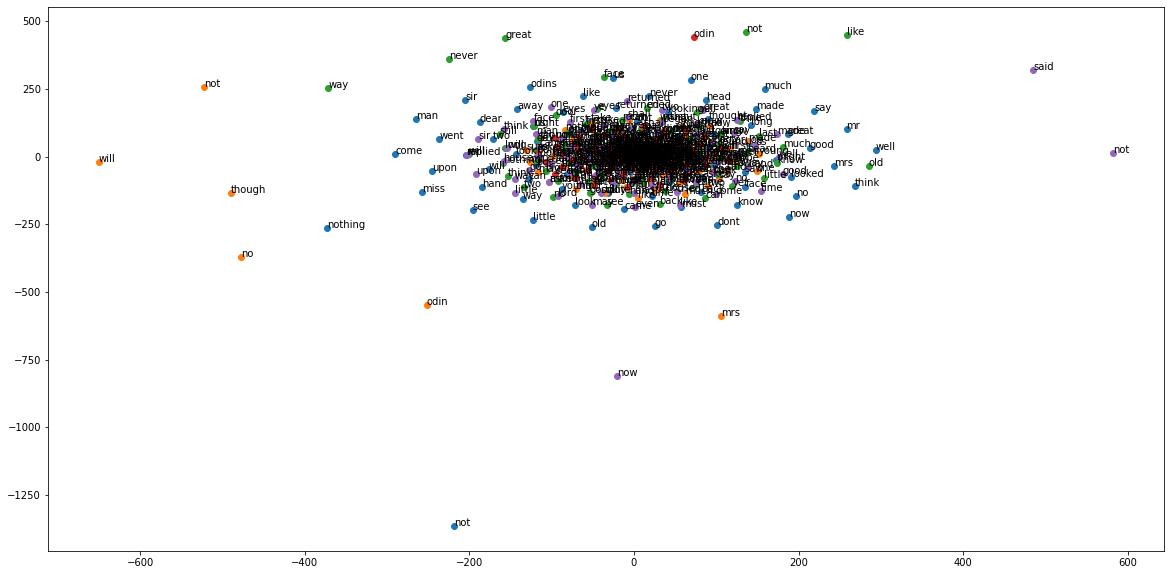

In [ ]:
#출처: https://donghwa-kim.github.io/TFIDF.html
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from future.utils import iteritems
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

fig = plt.figure(figsize=(20,10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3
i = 1

def plot_top_stopwords_barchart2(text):
    #stop=set(stopwords.words('english'))
    new= text.str.split()
    new=new.values.tolist()
    #documents = [' '.join(i[0].split(' ')[1:]) for i in article_data.values]
    #정규화를 통한 특수문자가 아니면 제거
    corpus=[re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',word) for i in new for word in i]
    #빈 문자열 제거
    corpus = [v for v in corpus if v]
    #print(corpus[1])
    count=Counter(corpus)
    vocab = sorted(count, key=count.get, reverse=True)
    # print("단어 빈도 많은 순으로 정렬")
    # print(vocab)
    tfidf = TfidfVectorizer(max_features = 100, max_df=0.95, min_df=0)
    
    #generate tf-idf term-document matrix
    A_tfidf_sp = tfidf.fit_transform(corpus)  #size D x V
    tfidf_dict = tfidf.get_feature_names()

    data_array = A_tfidf_sp.toarray()
    data = pd.DataFrame(data_array, columns=tfidf_dict)
    #단어 간의 친밀도를 보기 위해서!
    tsne = TSNE(n_components=2, n_iter=10000, verbose=1)

    Z = tsne.fit_transform(data_array.T)
    plt.scatter(Z[:,0], Z[:,1])
    for i in range(len(tfidf_dict)):
      plt.annotate(s=tfidf_dict[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]))
    plt.draw()

for i in range(5):
  plot_top_stopwords_barchart2(train[train['author']==i]['text'])

In [ ]:
train[train['author']==0]['text']

8                               not last sunday night said
12       scant luggage take london little little posses...
19       fact returned odin mr odin completely hemmed a...
20       dora delighted little presents kissed joyfully...
23       kind tone answer sweet voice gentle manner abs...
                               ...                        
54869                         afraid brittles said mr odin
54870                            dont fear will true death
54872                 premium sir returned thousand pounds
54873    looked back shoulder beckoned enter mr odin go...
54878                 certainly not occurred said yes like
Name: text, Length: 13235, dtype: object

## author_0 중요 단어 그룹화

author 0 tf-idf
단어 빈도 많은 순으로 정렬
['odin', 'said', 'mr', 'not', 'no', 'one', 'little', 'upon', 'know', 'now', 'old', 'time', 'miss', 'man', 'come', 'dont', 'well', 'say', 'will', 'dear', 'much', 'never', 'like', 'made', 'see', 'think', 'hand', 'good', 'head', 'mrs', 'odins', 'replied', 'sir', 'looked', 'us', 'way', 'go', 'went', 'face', 'back', 'two', 'came', 'young', 'long', 'away', 'returned', 'eyes', 'great', 'might', 'look', 'looking', 'thought', 'must', 'nothing', 'aunt', 'night', 'can', 'first', 'may', 'boy', 'joe', 'ever', 'saw', 'took', 'day', 'take', 'going', 'put', 'another', 'got', 'asked', 'quite', 'without', 'door', 'mind', 'done', 'yes', 'oh', 'last', 'room', 'tell', 'make', 'life', 'gentleman', 'house', 'off', 'cried', 'hands', 'always', 'still', 'shall', 'doctor', 'better', 'let', 'even', 'round', 'sat', 'home', 'left', 'place', 'knew', 'many', 'mother', 'though', 'every', 'something', 'anything', 'seen', 'told', 'seemed', 'name', 'heart', 'dora', 'yet', 'found', 'ill', '

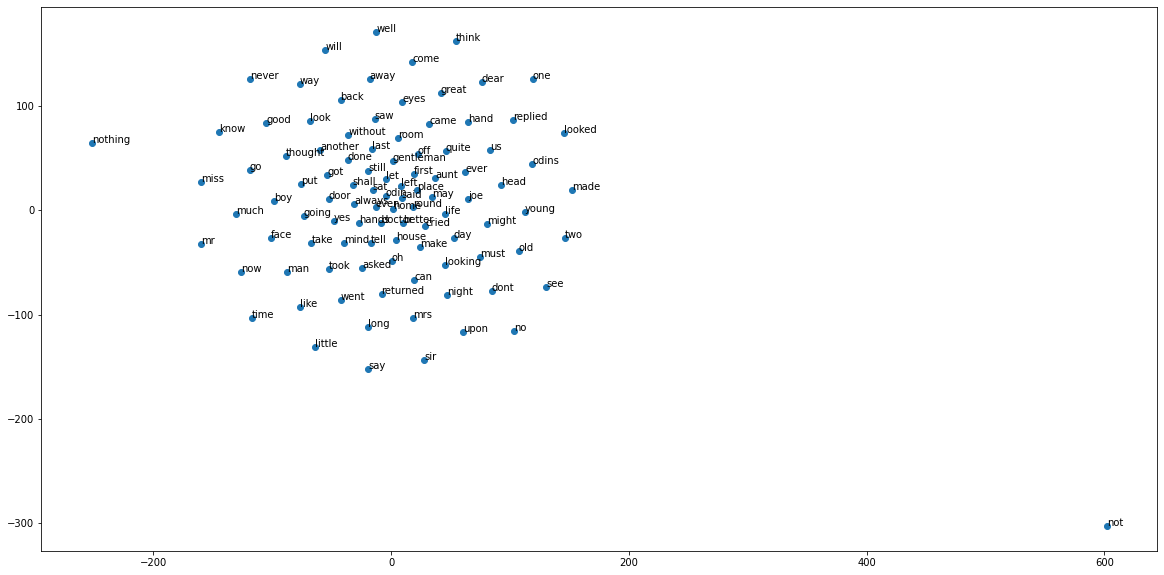

In [ ]:
#출처: https://donghwa-kim.github.io/TFIDF.html
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from future.utils import iteritems
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

fig = plt.figure(figsize=(20,10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3
i = 1

def plot_top_stopwords_barchart2(text):
    #stop=set(stopwords.words('english'))
    new= text.str.split()
    new=new.values.tolist()
    #documents = [' '.join(i[0].split(' ')[1:]) for i in article_data.values]
    #정규화를 통한 특수문자가 아니면 제거
    corpus=[re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',word) for i in new for word in i]
    #빈 문자열 제거
    corpus = [v for v in corpus if v]
    #print(corpus[1])
    count=Counter(corpus)
    vocab = sorted(count, key=count.get, reverse=True)
    print("단어 빈도 많은 순으로 정렬")
    print(vocab)
    tfidf = TfidfVectorizer(max_features = 100, max_df=0.95, min_df=0)
    
    #generate tf-idf term-document matrix
    A_tfidf_sp = tfidf.fit_transform(corpus)  #size D x V
    tfidf_dict = tfidf.get_feature_names()

    data_array = A_tfidf_sp.toarray()
    data = pd.DataFrame(data_array, columns=tfidf_dict)
    #단어 간의 친밀도를 보기 위해서!
    tsne = TSNE(n_components=2, n_iter=10000, verbose=1)

    Z = tsne.fit_transform(data_array.T)
    plt.scatter(Z[:,0], Z[:,1])
    for i in range(len(tfidf_dict)):
      plt.annotate(s=tfidf_dict[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]))
    plt.draw()

print("author 0 tf-idf")
plot_top_stopwords_barchart2(train[train['author']==0]['text'])

## author_1 중요 단어 그룹화

author 1 tf-idf
단어 빈도 많은 순으로 정렬
['odin', 'not', 'no', 'mr', 'said', 'will', 'mrs', 'odins', 'must', 'miss', 'one', 'much', 'think', 'well', 'now', 'know', 'every', 'little', 'never', 'time', 'can', 'might', 'good', 'nothing', 'may', 'say', 'without', 'see', 'soon', 'great', 'though', 'shall', 'first', 'two', 'man', 'quite', 'dear', 'thought', 'ever', 'upon', 'young', 'always', 'sir', 'made', 'lady', 'like', 'sure', 'make', 'thing', 'long', 'go', 'give', 'sister', 'day', 'away', 'many', 'last', 'come', 'however', 'house', 'way', 'hope', 'indeed', 'us', 'even', 'better', 'room', 'friend', 'cannot', 'enough', 'just', 'oh', 'saw', 'mind', 'felt', 'jane', 'father', 'cried', 'came', 'done', 'moment', 'seemed', 'something', 'family', 'still', 'look', 'wish', 'happy', 'rather', 'yes', 'really', 'perhaps', 'mother', 'home', 'heard', 'another', 'morning', 'looked', 'going', 'take', 'heart', 'believe', 'feelings', 'pleasure', 'found', 'replied', 'till', 'yet', 'love', 'part', 'place', 'letter', '

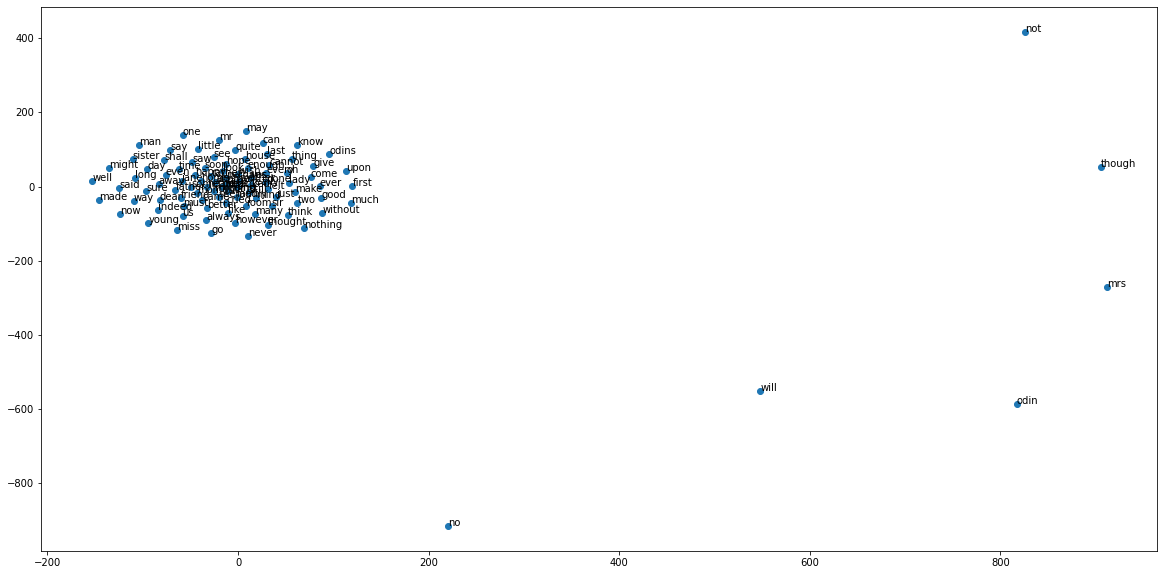

In [ ]:
#출처: https://donghwa-kim.github.io/TFIDF.html
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from future.utils import iteritems
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

fig = plt.figure(figsize=(20,10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3
i = 1

def plot_top_stopwords_barchart2(text):
    #stop=set(stopwords.words('english'))
    new= text.str.split()
    new=new.values.tolist()
    #documents = [' '.join(i[0].split(' ')[1:]) for i in article_data.values]
    #정규화를 통한 특수문자가 아니면 제거
    corpus=[re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',word) for i in new for word in i]
    #빈 문자열 제거
    corpus = [v for v in corpus if v]
    #print(corpus[1])
    count=Counter(corpus)
    vocab = sorted(count, key=count.get, reverse=True)
    print("단어 빈도 많은 순으로 정렬")
    print(vocab)
    tfidf = TfidfVectorizer(max_features = 100, max_df=0.95, min_df=0)
    
    #generate tf-idf term-document matrix
    A_tfidf_sp = tfidf.fit_transform(corpus)  #size D x V
    tfidf_dict = tfidf.get_feature_names()

    data_array = A_tfidf_sp.toarray()
    data = pd.DataFrame(data_array, columns=tfidf_dict)
    #단어 간의 친밀도를 보기 위해서!
    tsne = TSNE(n_components=2, n_iter=10000, verbose=1)

    Z = tsne.fit_transform(data_array.T)
    plt.scatter(Z[:,0], Z[:,1])
    for i in range(len(tfidf_dict)):
      plt.annotate(s=tfidf_dict[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]))
    plt.draw()

print("author 1 tf-idf")
plot_top_stopwords_barchart2(train[train['author']==1]['text'])

## author_2 중요 단어 그룹화

author 2 tf-idf
단어 빈도 많은 순으로 정렬
['odin', 'said', 'not', 'upon', 'one', 'no', 'man', 'will', 'us', 'sir', 'see', 'now', 'can', 'well', 'may', 'come', 'mr', 'little', 'cried', 'two', 'came', 'know', 'back', 'time', 'face', 'must', 'think', 'never', 'great', 'like', 'might', 'way', 'say', 'hand', 'good', 'asked', 'long', 'last', 'shall', 'eyes', 'yet', 'old', 'room', 'made', 'much', 'heard', 'door', 'house', 'nothing', 'away', 'still', 'go', 'first', 'saw', 'night', 'found', 'left', 'round', 'thought', 'every', 'tell', 'head', 'take', 'make', 'ever', 'off', 'side', 'get', 'day', 'yes', 'just', 'three', 'lord', 'matter', 'young', 'case', 'however', 'seen', 'life', 'took', 'small', 'done', 'black', 'far', 'men', 'hands', 'light', 'right', 'without', 'friend', 'let', 'even', 'something', 'give', 'dont', 'find', 'end', 'looked', 'answered', 'odins', 'lady', 'many', 'morning', 'look', 'name', 'mind', 'lay', 'put', 'though', 'behind', 'enough', 'seemed', 'thing', 'turned', 'dr', 'went', 'got', 

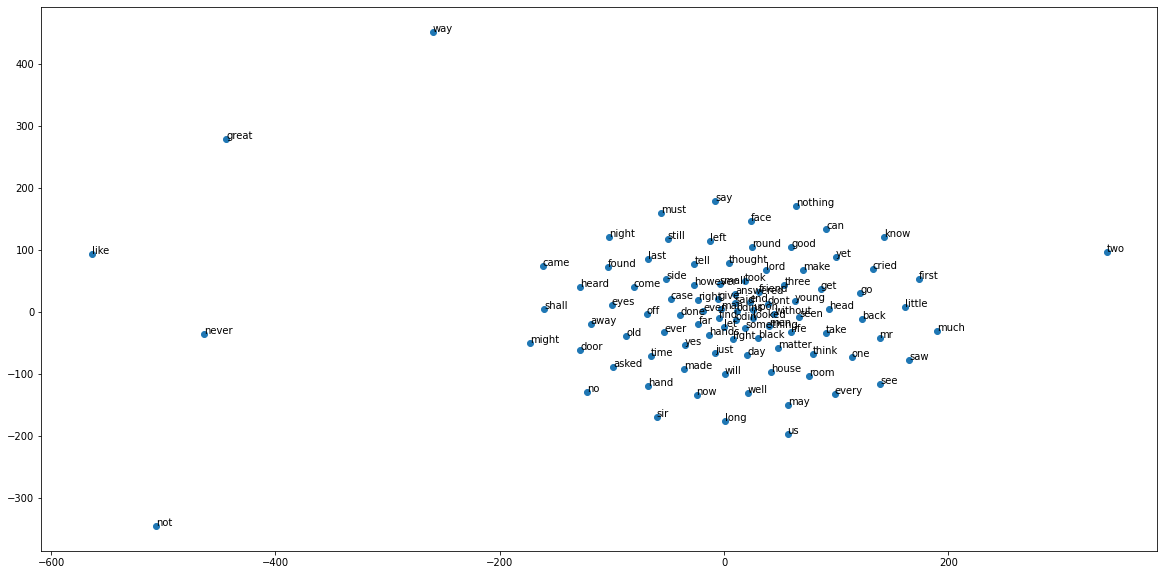

In [ ]:
#출처: https://donghwa-kim.github.io/TFIDF.html
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from future.utils import iteritems
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

fig = plt.figure(figsize=(20,10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3
i = 1

def plot_top_stopwords_barchart2(text):
    #stop=set(stopwords.words('english'))
    new= text.str.split()
    new=new.values.tolist()
    #documents = [' '.join(i[0].split(' ')[1:]) for i in article_data.values]
    #정규화를 통한 특수문자가 아니면 제거
    corpus=[re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',word) for i in new for word in i]
    #빈 문자열 제거
    corpus = [v for v in corpus if v]
    #print(corpus[1])
    count=Counter(corpus)
    vocab = sorted(count, key=count.get, reverse=True)
    print("단어 빈도 많은 순으로 정렬")
    print(vocab)
    tfidf = TfidfVectorizer(max_features = 100, max_df=0.95, min_df=0)
    
    #generate tf-idf term-document matrix
    A_tfidf_sp = tfidf.fit_transform(corpus)  #size D x V
    tfidf_dict = tfidf.get_feature_names()

    data_array = A_tfidf_sp.toarray()
    data = pd.DataFrame(data_array, columns=tfidf_dict)
    #단어 간의 친밀도를 보기 위해서!
    tsne = TSNE(n_components=2, n_iter=10000, verbose=1)

    Z = tsne.fit_transform(data_array.T)
    plt.scatter(Z[:,0], Z[:,1])
    for i in range(len(tfidf_dict)):
      plt.annotate(s=tfidf_dict[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]))
    plt.draw()

print("author 2 tf-idf")
plot_top_stopwords_barchart2(train[train['author']==2]['text'])

## author_3 중요 단어 그룹화

author 3 tf-idf
단어 빈도 많은 순으로 정렬
['odin', 'not', 'one', 'said', 'no', 'will', 'know', 'now', 'dont', 'come', 'though', 'like', 'man', 'prince', 'time', 'go', 'see', 'even', 'say', 'suddenly', 'well', 'odins', 'cried', 'must', 'just', 'thats', 'last', 'can', 'nothing', 'something', 'tell', 'thought', 'little', 'went', 'away', 'shall', 'face', 'asked', 'never', 'ill', 'without', 'perhaps', 'eyes', 'first', 'much', 'began', 'old', 'off', 'oh', 'yes', 'us', 'looked', 'think', 'still', 'moment', 'made', 'way', 'two', 'came', 'quite', 'good', 'day', 'may', 'every', 'take', 'course', 'let', 'make', 'almost', 'three', 'people', 'ive', 'back', 'room', 'look', 'long', 'great', 'believe', 'another', 'father', 'put', 'told', 'going', 'get', 'understand', 'right', 'love', 'money', 'life', 'seemed', 'upon', 'hand', 'give', 'house', 'want', 'always', 'might', 'heard', 'heart', 'ivan', 'word', 'really', 'whole', 'woman', 'took', 'anything', 'everything', 'looking', 'turned', 'yet', 'mind', 'door', 'won

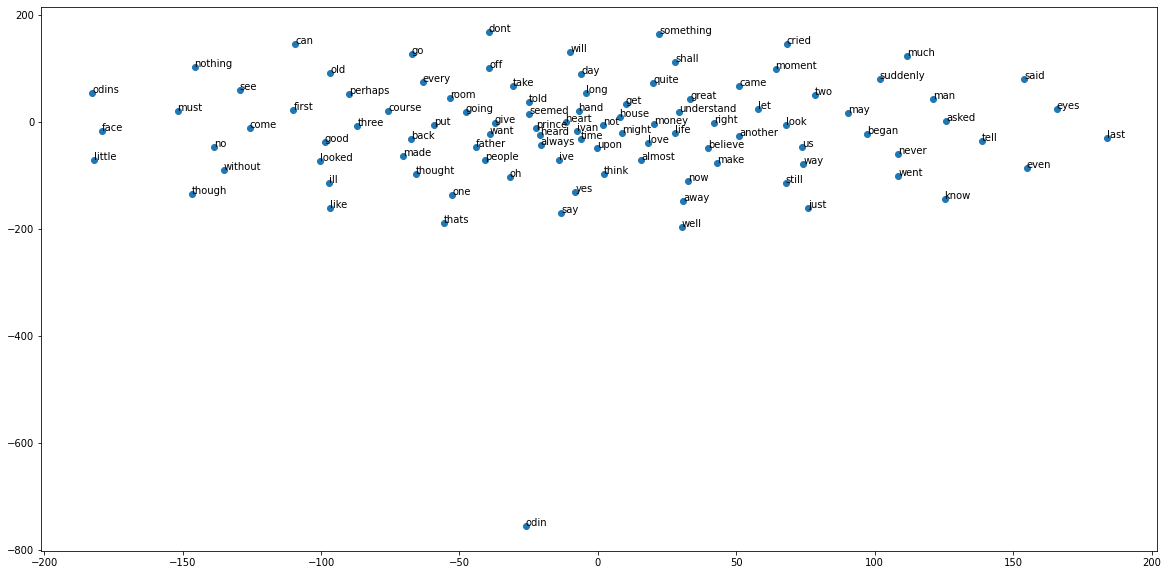

In [ ]:
#출처: https://donghwa-kim.github.io/TFIDF.html
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from future.utils import iteritems
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

fig = plt.figure(figsize=(20,10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3
i = 1

def plot_top_stopwords_barchart2(text):
    #stop=set(stopwords.words('english'))
    new= text.str.split()
    new=new.values.tolist()
    #documents = [' '.join(i[0].split(' ')[1:]) for i in article_data.values]
    #정규화를 통한 특수문자가 아니면 제거
    corpus=[re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',word) for i in new for word in i]
    #빈 문자열 제거
    corpus = [v for v in corpus if v]
    #print(corpus[1])
    count=Counter(corpus)
    vocab = sorted(count, key=count.get, reverse=True)
    print("단어 빈도 많은 순으로 정렬")
    print(vocab)
    tfidf = TfidfVectorizer(max_features = 100, max_df=0.95, min_df=0)
    
    #generate tf-idf term-document matrix
    A_tfidf_sp = tfidf.fit_transform(corpus)  #size D x V
    tfidf_dict = tfidf.get_feature_names()

    data_array = A_tfidf_sp.toarray()
    data = pd.DataFrame(data_array, columns=tfidf_dict)
    #단어 간의 친밀도를 보기 위해서!
    tsne = TSNE(n_components=2, n_iter=10000, verbose=1)

    Z = tsne.fit_transform(data_array.T)
    plt.scatter(Z[:,0], Z[:,1])
    for i in range(len(tfidf_dict)):
      plt.annotate(s=tfidf_dict[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]))
    plt.draw()

print("author 3 tf-idf")
plot_top_stopwords_barchart2(train[train['author']==3]['text'])

## author_4 중요 단어 그룹화

author 4 tf-idf
단어 빈도 많은 순으로 정렬
['odin', 'said', 'not', 'upon', 'no', 'man', 'one', 'will', 'now', 'like', 'ye', 'cried', 'well', 'sir', 'mr', 'little', 'good', 'time', 'see', 'hand', 'still', 'us', 'come', 'must', 'came', 'great', 'returned', 'two', 'house', 'back', 'know', 'last', 'made', 'never', 'think', 'thought', 'yet', 'replied', 'can', 'go', 'much', 'began', 'first', 'say', 'shall', 'even', 'old', 'may', 'lord', 'face', 'asked', 'says', 'long', 'looked', 'way', 'men', 'master', 'prince', 'doctor', 'eyes', 'odins', 'take', 'night', 'life', 'word', 'let', 'day', 'door', 'might', 'another', 'went', 'hands', 'head', 'indeed', 'mind', 'name', 'heart', 'side', 'captain', 'seemed', 'make', 'set', 'lay', 'without', 'young', 'took', 'nothing', 'turned', 'moment', 'look', 'away', 'place', 'open', 'among', 'tell', 'enough', 'saw', 'many', 'off', 'sure', 'thing', 'heard', 'put', 'ill', 'right', 'part', 'left', 'give', 'voice', 'far', 'o', 'found', 'soon', 'better', 'poor', 'stood', 'perhap

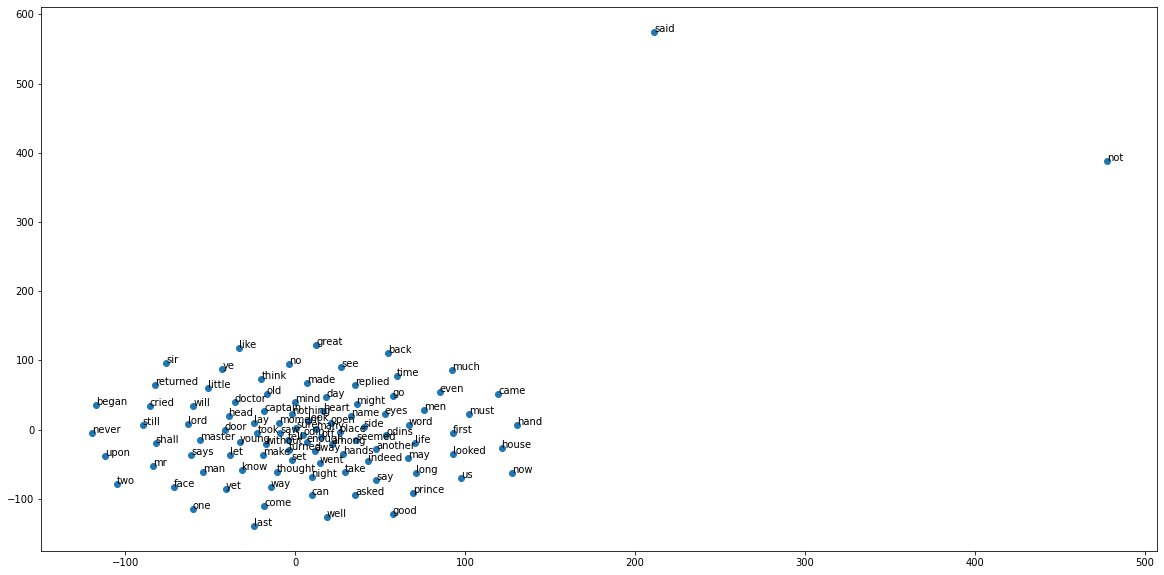

In [ ]:
#출처: https://donghwa-kim.github.io/TFIDF.html
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from future.utils import iteritems
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

fig = plt.figure(figsize=(20,10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3
i = 1

def plot_top_stopwords_barchart2(text):
    #stop=set(stopwords.words('english'))
    new= text.str.split()
    new=new.values.tolist()
    #documents = [' '.join(i[0].split(' ')[1:]) for i in article_data.values]
    #정규화를 통한 특수문자가 아니면 제거
    corpus=[re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',word) for i in new for word in i]
    #빈 문자열 제거
    corpus = [v for v in corpus if v]
    #print(corpus[1])
    count=Counter(corpus)
    vocab = sorted(count, key=count.get, reverse=True)
    print("단어 빈도 많은 순으로 정렬")
    print(vocab)
    tfidf = TfidfVectorizer(max_features = 100, max_df=0.95, min_df=0)
    
    #generate tf-idf term-document matrix
    A_tfidf_sp = tfidf.fit_transform(corpus)  #size D x V
    tfidf_dict = tfidf.get_feature_names()

    data_array = A_tfidf_sp.toarray()
    data = pd.DataFrame(data_array, columns=tfidf_dict)
    #단어 간의 친밀도를 보기 위해서!
    tsne = TSNE(n_components=2, n_iter=10000, verbose=1)

    Z = tsne.fit_transform(data_array.T)
    plt.scatter(Z[:,0], Z[:,1])
    for i in range(len(tfidf_dict)):
      plt.annotate(s=tfidf_dict[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]))
    plt.draw()

print("author 4 tf-idf")
plot_top_stopwords_barchart2(train[train['author']==4]['text'])